In [45]:
! pip install geopy

In [46]:
import pandas as pd
from geopy.geocoders import Nominatim

In [47]:
df = pd.read_csv('data/CoffeeBean.csv')
df.address

0                              서울시 강남구 학동로 211 1층  
1                        서울시 강남구 광평로 280 수서동 724호  
2                         서울시 강남구 논현로 566 강남차병원1층  
3                             서울시 서초구 강남대로 369 1층  
4                        서울 강남구 삼성동 159 코엑스몰 지하2층  
                           ...                     
238    인천광역시 중구 운서동 2868 인천공항 제2터미널 1층 연번(23-124)  
239                         부산광역시 부산진구 서전로 12, 1층  
240                     경기도 성남시 분당구 야탑로64 DS타워 1층  
241                                서울시 용산구 한강대로95  
242                     서울특별시 강남구 선릉로 433 세방빌딩 1층  
Name: address, Length: 243, dtype: object

In [48]:
geolocoder = Nominatim(user_agent='South Korea')
a = ['서울특별시 강남구 학동로 211', '서울특별시 강남구 광평로 280', '서울특별시 강남구 논현로 566', '부산광역시 해운대구 선수촌로 9','부산광역시 부산진구 중앙대로 708']
for i, loc in enumerate(a):
    # print(i, loc)
    geo = geolocoder.geocode(loc)
    crd = (geo.latitude, geo.longitude)
    print(geo, crd)

학동로, 삼성동, 삼성1동, 강남구, 서울, 06078, 대한민국 (37.5199698, 127.056947)
중앙물산, 280, 광평로, 수서동, 강남구, 서울, 06367, 대한민국 (37.487311, 127.1030943)
논현로, 신사동, 압구정동, 신사동, 강남구, 서울, 06025, 대한민국 (37.5272651, 127.0283095)
9, 선수촌로, 반여1동, 해운대구, 부산, 48038, 대한민국 (35.194718800000004, 129.11718242859845)
708, 중앙대로, 부전동, 부전2동, 부산진구, 부산, 47291, 대한민국 (35.155989250000005, 129.05952494574848)


In [49]:
data = pd.read_csv('data/보건복지부_공공보건 의료기관 현황_20161231.csv')
# data2 = data['주소'].apply()
# add['시도']=add['시도'].apply(lambda v: addr_aliase.get(v, v))

In [50]:
addr = pd.DataFrame(data['주소'].apply(lambda v: v.split()[:2]).to_list(), columns=['시도', '군구'])
addr

,시도,군구
0,강원도,춘천시
1,강원도,삼척시
2,강원도,영월군
3,강원도,원주시
4,강원도,강릉시
...,...,...
222,충청북도,제천시
223,충청북도,충주시
224,충청북도,충주시
225,충청북도,영동군


In [51]:
addr['시도'].unique()

array(['강원도', '경기도', '경기', '경남', '창원시', '경상남도', '경상북도', '경산시', '경북',
       '인천광역시', '대구광역시', '전라남도', '대전광역시', '광주광역시', '제주특별자치도', '부산광역시',
       '전라북도', '충북', '서울특별시', '서울시', '부산특별시', '대전시', '충남', '전남', '충청남도',
       '울산광역시', '전북', '천안시', '충청북도'], dtype=object)

In [52]:
addr[addr['시도']=='창원시']

,시도,군구
27,창원시,의창구
31,창원시,마산합포구3.15대로


In [53]:
addr.iloc[27] = ['경상남도', '창원시']
addr.iloc[31] = ['경상남도', '창원시']
addr['시도'].unique()

array(['강원도', '경기도', '경기', '경남', '경상남도', '경상북도', '경산시', '경북', '인천광역시',
       '대구광역시', '전라남도', '대전광역시', '광주광역시', '제주특별자치도', '부산광역시', '전라북도',
       '충북', '서울특별시', '서울시', '부산특별시', '대전시', '충남', '전남', '충청남도', '울산광역시',
       '전북', '천안시', '충청북도'], dtype=object)

In [54]:
addr[addr['시도'] == '경산시']
addr.iloc[47] = ['경상북도', '경산시']
addr['시도'].unique()

array(['강원도', '경기도', '경기', '경남', '경상남도', '경상북도', '경북', '인천광역시', '대구광역시',
       '전라남도', '대전광역시', '광주광역시', '제주특별자치도', '부산광역시', '전라북도', '충북',
       '서울특별시', '서울시', '부산특별시', '대전시', '충남', '전남', '충청남도', '울산광역시', '전북',
       '천안시', '충청북도'], dtype=object)

In [55]:
addr[addr['시도'] == '천안시']
addr.iloc[209] = ['충청남도', '천안시']
addr.iloc[210] = ['충청남도', '천안시']
addr['시도'].unique()

array(['강원도', '경기도', '경기', '경남', '경상남도', '경상북도', '경북', '인천광역시', '대구광역시',
       '전라남도', '대전광역시', '광주광역시', '제주특별자치도', '부산광역시', '전라북도', '충북',
       '서울특별시', '서울시', '부산특별시', '대전시', '충남', '전남', '충청남도', '울산광역시', '전북',
       '충청북도'], dtype=object)

In [56]:
addr_aliases = {'경기': '경기도', '경남': '경상남도', '경북': '경상북도', '충북': '충청북도', '충남': '충청남도', '전남': '전라남도', '전북': '전라북도', '서울시': '서울특별시', '부산특별시': '부산광역시', '대전시': '대전광역시'}
addr['시도'] = addr['시도'].apply(lambda v: addr_aliases.get(v, v))
addr['시도'].unique()

array(['강원도', '경기도', '경상남도', '경상북도', '인천광역시', '대구광역시', '전라남도', '대전광역시',
       '광주광역시', '제주특별자치도', '부산광역시', '전라북도', '충청북도', '서울특별시', '충청남도',
       '울산광역시'], dtype=object)

In [57]:
addr['군구'].unique()

array(['춘천시', '삼척시', '영월군', '원주시', '강릉시', '속초시', '정선군', '수원시', '이천시',
       '안성시', '의정부시', '포천시', '파주시', '용인시', '평택시', '시흥시', '여주시', '남양주시',
       '동두천시', '안산시', '부천시', '통영시', '사천시', '창원시', '김해시', '양산시', '거창군',
       '남해군', '의령군', '포항시', '김천시', '안동시', '울진군', '경주시', '구미시', '영주시',
       '상주시', '문경시', '경산시', '의성군', '청도군', '고령군', '칠곡군', '봉화군', '울릉군',
       '부평구', '북구', '순천시', '대덕구', '태백시', '동해시', '화성시', '광산구', '남구', '중구',
       '아란13길', '서구', '전주시', '진주시', '청주시', '종로구', '성남시', '동구', '화순군',
       '강동구', '사상구', '달서구', '해운대구', '유성구', '가평군', '양주시', '고양시', '홍천군',
       '양구군', '청원군', '계룡시', '논산시', '함평군', '양평군', '수성구', '달성군', '연수구',
       '노원구', '기장군', '공주시', '강북구', '광진구', '나주시', '창녕군', '목포시', '고흥군',
       '연제구', '동매로', '서초구', '은평구', '중랑구', '강남구', '동작구', '동대문구', '양천구',
       '성동구', '송파구', '울주군', '계양구', '옹진군', '보성군', '광양시', '영광군', '무안군',
       '진도군', '강진군', '곡성군', '여수시', '신안군', '장성군', '완주군', '부안군', '정읍시',
       '남원시', '군산시', '고창군', '진안군', '제주시', '서귀포시', '천안시', '보령시', '서산시',
       '서천

In [58]:
addr[addr['군구'] == '아란13길']

,시도,군구
75,제주특별자치도,아란13길


In [59]:
addr.iloc[75] = ['제주특별자치구', '제주시']

In [60]:
addr[addr['군구'] == '동매로']

,시도,군구
155,부산광역시,동매로


In [61]:
addr.iloc[155] = ['부산광역시', '사하구']

In [62]:
addr['군구'].unique()

array(['춘천시', '삼척시', '영월군', '원주시', '강릉시', '속초시', '정선군', '수원시', '이천시',
       '안성시', '의정부시', '포천시', '파주시', '용인시', '평택시', '시흥시', '여주시', '남양주시',
       '동두천시', '안산시', '부천시', '통영시', '사천시', '창원시', '김해시', '양산시', '거창군',
       '남해군', '의령군', '포항시', '김천시', '안동시', '울진군', '경주시', '구미시', '영주시',
       '상주시', '문경시', '경산시', '의성군', '청도군', '고령군', '칠곡군', '봉화군', '울릉군',
       '부평구', '북구', '순천시', '대덕구', '태백시', '동해시', '화성시', '광산구', '남구', '중구',
       '제주시', '서구', '전주시', '진주시', '청주시', '종로구', '성남시', '동구', '화순군', '강동구',
       '사상구', '달서구', '해운대구', '유성구', '가평군', '양주시', '고양시', '홍천군', '양구군',
       '청원군', '계룡시', '논산시', '함평군', '양평군', '수성구', '달성군', '연수구', '노원구',
       '기장군', '공주시', '강북구', '광진구', '나주시', '창녕군', '목포시', '고흥군', '연제구',
       '사하구', '서초구', '은평구', '중랑구', '강남구', '동작구', '동대문구', '양천구', '성동구',
       '송파구', '울주군', '계양구', '옹진군', '보성군', '광양시', '영광군', '무안군', '진도군',
       '강진군', '곡성군', '여수시', '신안군', '장성군', '완주군', '부안군', '정읍시', '남원시',
       '군산시', '고창군', '진안군', '서귀포시', '천안시', '보령시', '서산시', '서천군', '홍성군',
     

In [63]:
addr['시도군구'] = addr.apply(lambda v: v['시도'] + ' ' + v['군구'], axis=1)
addr['count']=0
addr.loc[addr['시도군구'] == '강원도 춘천시']

,시도,군구,시도군구,count
0,강원도,춘천시,강원도 춘천시,0
6,강원도,춘천시,강원도 춘천시,0
69,강원도,춘천시,강원도 춘천시,0
105,강원도,춘천시,강원도 춘천시,0
142,강원도,춘천시,강원도 춘천시,0


In [64]:
addr_group = pd.DataFrame(addr.groupby(['시도', '군구', '시도군구'], as_index=False).count())
addr_group = addr_group.set_index('시도군구')
addr_group

,시도,군구,count
시도군구,,,
강원도 강릉시,강원도,강릉시,4
강원도 동해시,강원도,동해시,1
강원도 삼척시,강원도,삼척시,1
강원도 속초시,강원도,속초시,1
강원도 양구군,강원도,양구군,1
...,...,...,...
충청북도 영동군,충청북도,영동군,1
충청북도 제천시,충청북도,제천시,1
충청북도 청원군,충청북도,청원군,1


In [65]:
population = pd.read_csv('data/행정구역_시군구_별__성별_인구수_20230717102211.csv')
population.head()

,행정구역시도,행정구역군구,총인구수,남자인구수,여자인구수
0,전국,소계,51392745,25607244,25785501
1,서울특별시,소계,9414093,4557609,4856484
2,서울특별시,종로구,140397,67834,72563
3,서울특별시,중구,121441,58857,62584
4,서울특별시,용산구,217288,104357,112931


In [68]:
# population = population[population['군구'] != '소계'].rename(columns={'행정구역시도': '시도', '행정구역군구': '군구', '남자인구수': '남자', '여자인구수': '여자'})
population = population.rename(columns={'행정구역시도': '시도', '행정구역군구': '군구', '남자인구수': '남자', '여자인구수': '여자'})
population.head()

,시도,군구,총인구수,남자,여자
0,전국,소계,51392745,25607244,25785501
1,서울특별시,소계,9414093,4557609,4856484
2,서울특별시,종로구,140397,67834,72563
3,서울특별시,중구,121441,58857,62584
4,서울특별시,용산구,217288,104357,112931


In [69]:
population['군구'].unique()

array(['소계', '종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구',
       '강북구', '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구',
       '금천구', '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구', '서구',
       '동구', '영도구', '부산진구', '동래구', '남구', '북구', '해운대구', '사하구', '금정구',
       '연제구', '수영구', '사상구', '기장군', '수성구', '달서구', '달성군', '미추홀구', '연수구',
       '남동구', '부평구', '계양구', '강화군', '옹진군', '광산구', '유성구', '대덕구', '울산',
       '울주군', '세종시', '수원시', '장안구', '권선구', '팔달구', '영통구', '성남시', '수정구',
       '중원구', '분당구', '의정부시', '안양시', '만안구', '동안구', '부천시', '광명시', '평택시',
       '동두천시', '안산시', '상록구', '단원구', '고양시', '덕양구', '일산동구', '일산서구', '과천시',
       '구리시', '남양주시', '오산시', '시흥시', '군포시', '의왕시', '하남시', '용인시', '처인구',
       '기흥구', '수지구', '파주시', '이천시', '안성시', '김포시', '화성시', '광주시', '양주시',
       '포천시', '여주시', '연천군', '가평군', '양평군', '춘천시', '원주시', '강릉시', '동해시',
       '태백시', '속초시', '삼척시', '홍천군', '횡성군', '영월군', '평창군', '정선군', '철원군',
       '화천군', '양구군', '인제군', '고성군', '양양군', '청주시', '서원구', '청원구', '상당구',
       '흥덕구', '충

In [72]:
population['시도군구'] = population.apply(lambda v: v['시도'] + ' ' + v['군구'], axis=1)
population = population[population.군구 != '소계']
population=population.set_index('시도군구')
population

,시도,군구,총인구수,남자,여자
시도군구,,,,,
서울특별시 종로구,서울특별시,종로구,140397,67834,72563
서울특별시 중구,서울특별시,중구,121441,58857,62584
서울특별시 용산구,서울특별시,용산구,217288,104357,112931
서울특별시 성동구,서울특별시,성동구,279374,135723,143651
서울특별시 광진구,서울특별시,광진구,336169,161755,174414
...,...,...,...,...,...
경상남도 함양군,경상남도,함양군,37294,18105,19189
경상남도 거창군,경상남도,거창군,60356,29704,30652
경상남도 합천군,경상남도,합천군,41741,20339,21402


In [74]:
# addr_population = pd.merge(addr_group, population, how='inner')
addr_population = pd.merge(addr_group, population, left_index=True, right_index=True, how='inner')
addr_population

,시도_x,군구_x,count,시도_y,군구_y,총인구수,남자,여자
시도군구,,,,,,,,
강원도 강릉시,강원도,강릉시,4,강원도,강릉시,210456,104324,106132
강원도 동해시,강원도,동해시,1,강원도,동해시,89058,45253,43805
강원도 삼척시,강원도,삼척시,1,강원도,삼척시,63270,32093,31177
강원도 속초시,강원도,속초시,1,강원도,속초시,82474,40873,41601
강원도 양구군,강원도,양구군,1,강원도,양구군,21315,11197,10118
...,...,...,...,...,...,...,...,...
충청북도 단양군,충청북도,단양군,1,충청북도,단양군,27699,14096,13603
충청북도 영동군,충청북도,영동군,1,충청북도,영동군,44617,22353,22264
충청북도 제천시,충청북도,제천시,1,충청북도,제천시,131231,65990,65241


In [77]:
addr_population2 = addr_population[['시도_x', '군구_x', 'count', '총인구수']]
addr_population2 = addr_population2.rename(columns={'시도_x':'시도', '군구_x':'군구', '총인구수':'인구수'})
addr_population2

,시도,군구,count,인구수
시도군구,,,,
강원도 강릉시,강원도,강릉시,4,210456
강원도 동해시,강원도,동해시,1,89058
강원도 삼척시,강원도,삼척시,1,63270
강원도 속초시,강원도,속초시,1,82474
강원도 양구군,강원도,양구군,1,21315
...,...,...,...,...
충청북도 단양군,충청북도,단양군,1,27699
충청북도 영동군,충청북도,영동군,1,44617
충청북도 제천시,충청북도,제천시,1,131231


In [79]:
counts=addr_population2['count']
addr_population2['ratio']=counts.divide(addr_population2['인구수'], axis=0)*100000
addr_population2

,시도,군구,count,인구수,ratio
시도군구,,,,,
강원도 강릉시,강원도,강릉시,4,210456,1.900635
강원도 동해시,강원도,동해시,1,89058,1.122864
강원도 삼척시,강원도,삼척시,1,63270,1.580528
강원도 속초시,강원도,속초시,1,82474,1.212503
강원도 양구군,강원도,양구군,1,21315,4.691532
...,...,...,...,...,...
충청북도 단양군,충청북도,단양군,1,27699,3.610239
충청북도 영동군,충청북도,영동군,1,44617,2.241298
충청북도 제천시,충청북도,제천시,1,131231,0.762015


In [81]:
data_draw_korea = pd.read_csv('data/data_draw_korea.csv', index_col=0)
data_draw_korea

,인구수,shortName,x,y,면적,광역시도,행정구역
0,202520,강릉,11,4,1040.07,강원도,강릉시
1,25589,고성(강원),9,0,664.19,강원도,고성군
2,86747,동해,11,5,180.01,강원도,동해시
3,63986,삼척,11,8,1185.80,강원도,삼척시
4,76733,속초,9,1,105.25,강원도,속초시
...,...,...,...,...,...,...,...
224,127462,제천,8,10,882.47,충청북도,제천시
225,34480,증평,6,11,81.84,충청북도,증평군
226,62809,진천,5,11,406.08,충청북도,진천군
227,790216,청주,6,12,932.51,충청북도,청주시


In [86]:
data_draw_korea['시도군구']=data_draw_korea.apply(lambda r:r['광역시도']+' '+r['행정구역'], axis=1)
data_draw_korea = data_draw_korea.set_index('시도군구')
data_draw_korea


,인구수,shortName,x,y,면적,광역시도,행정구역
시도군구,,,,,,,
강원도 강릉시,202520,강릉,11,4,1040.07,강원도,강릉시
강원도 고성군,25589,고성(강원),9,0,664.19,강원도,고성군
강원도 동해시,86747,동해,11,5,180.01,강원도,동해시
강원도 삼척시,63986,삼척,11,8,1185.80,강원도,삼척시
강원도 속초시,76733,속초,9,1,105.25,강원도,속초시
...,...,...,...,...,...,...,...
충청북도 제천시,127462,제천,8,10,882.47,충청북도,제천시
충청북도 증평군,34480,증평,6,11,81.84,충청북도,증평군
충청북도 진천군,62809,진천,5,11,406.08,충청북도,진천군


In [89]:
data_draw_korea_addr_population = pd.merge(data_draw_korea, addr_population2, how='inner', left_index=True, right_index=True)
data_draw_korea_addr_population


,인구수_x,shortName,x,y,면적,광역시도,행정구역,시도,군구,count,인구수_y,ratio
시도군구,,,,,,,,,,,,
강원도 강릉시,202520,강릉,11,4,1040.07,강원도,강릉시,강원도,강릉시,4,210456,1.900635
강원도 동해시,86747,동해,11,5,180.01,강원도,동해시,강원도,동해시,1,89058,1.122864
강원도 삼척시,63986,삼척,11,8,1185.80,강원도,삼척시,강원도,삼척시,1,63270,1.580528
강원도 속초시,76733,속초,9,1,105.25,강원도,속초시,강원도,속초시,1,82474,1.212503
강원도 양구군,20809,양구,8,0,700.80,강원도,양구군,강원도,양구군,1,21315,4.691532
...,...,...,...,...,...,...,...,...,...,...,...,...
충청북도 단양군,27130,단양,7,10,781.07,충청북도,단양군,충청북도,단양군,1,27699,3.610239
충청북도 영동군,46524,영동,6,14,845.01,충청북도,영동군,충청북도,영동군,1,44617,2.241298
충청북도 제천시,127462,제천,8,10,882.47,충청북도,제천시,충청북도,제천시,1,131231,0.762015


In [91]:
BORDER_LINES = [
    [(3, 2), (5, 2), (5, 3), (9, 3), (9, 1)], # 인천
    [(2, 5), (3, 5), (3, 4), (8, 4), (8, 7), (7, 7), (7, 9), (4, 9), (4, 7), (1, 7)], # 서울
    [(1, 6), (1, 9), (3, 9), (3, 10), (8, 10), (8, 9),
     (9, 9), (9, 8), (10, 8), (10, 5), (9, 5), (9, 3)], # 경기도
    [(9, 12), (9, 10), (8, 10)], # 강원도
    [(10, 5), (11, 5), (11, 4), (12, 4), (12, 5), (13, 5),
     (13, 4), (14, 4), (14, 2)], # 충청남도
    [(11, 5), (12, 5), (12, 6), (15, 6), (15, 7), (13, 7),
     (13, 8), (11, 8), (11, 9), (10, 9), (10, 8)], # 충청북도
    [(14, 4), (15, 4), (15, 6)], # 대전시
    [(14, 7), (14, 9), (13, 9), (13, 11), (13, 13)], # 경상북도
    [(14, 8), (16, 8), (16, 10), (15, 10),
     (15, 11), (14, 11), (14, 12), (13, 12)], # 대구시
    [(15, 11), (16, 11), (16, 13)], # 울산시
    [(17, 1), (17, 3), (18, 3), (18, 6), (15, 6)], # 전라북도
    [(19, 2), (19, 4), (21, 4), (21, 3), (22, 3), (22, 2), (19, 2)], # 광주시
    [(18, 5), (20, 5), (20, 6)], # 전라남도
    [(16, 9), (18, 9), (18, 8), (19, 8), (19, 9), (20, 9), (20, 10)], # 부산시
]

In [103]:
import matplotlib.pyplot as plt
import numpy as np

In [116]:
def draw_blockedMap(blockedMap, targetData, title, color):
    whitelabelmin=(max(blockedMap[targetData]-min(blockedMap[targetData]))*0.25+min(blockedMap[targetData]))
    datalabel = targetData
    vmin=min(blockedMap[targetData])
    vmax=max(blockedMap[targetData])
    mapdata = blockedMap.pivot(index='y', columns='x', values=targetData)
    masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)

    plt.figure(figsize=(6, 9))
    plt.title(title)
    plt.pcolor(masked_mapdata, vmin=vmin, vmax=vmax, cmap=color, edgecolor = '#aaaaaa', linewidth=0)



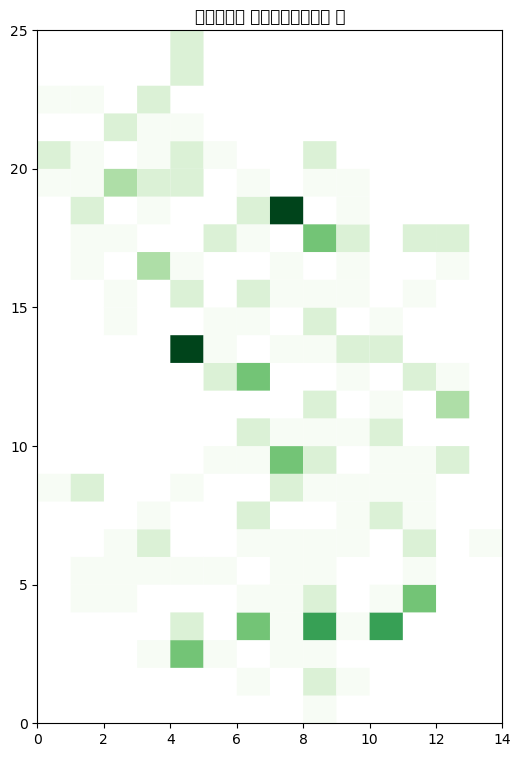

In [118]:
draw_blockedMap(data_draw_korea_addr_population, 'count', '행정구역별 공공보건의료기관 수', 'Greens')

c:\Users\it\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  func(*args, **kwargs)
c:\Users\it\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  func(*args, **kwargs)
c:\Users\it\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current font.
  func(*args, **kwargs)
c:\Users\it\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\it\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\it\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48708 (\N{HANGUL SYLL

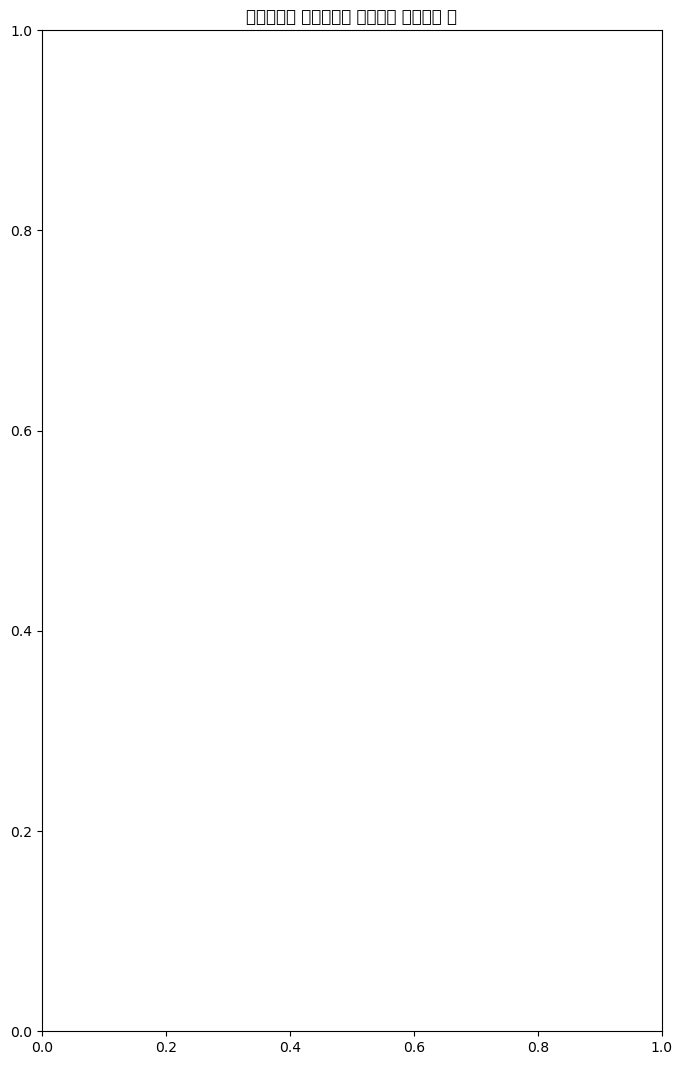

In [106]:
draw_blockedMap(data_draw_korea_addr_population, 'ratio', '행정구역별 인구수대비 공공보건 의료기관 수', 'Reds')